In [1]:
pip install openpiv

Note: you may need to restart the kernel to use updated packages.


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import openpiv.pyprocess
import openpiv.scaling
from skimage.io import imread

In [227]:
# Load images
img1 = imread("frame_0.jpg")
img2 = imread("frame_700.jpg")

In [228]:
height , width = img1.shape

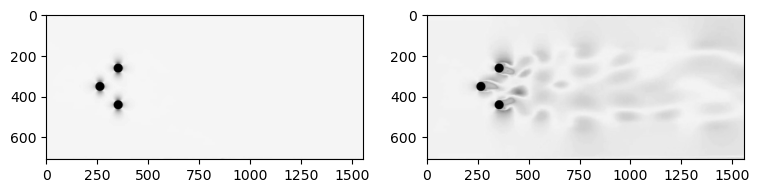

In [229]:
# Display images
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(img1, cmap=plt.cm.gray)
axs[1].imshow(img2, cmap=plt.cm.gray)
plt.show()

In [230]:
# Define parameters for PIV analysis
window_size = 64
overlap = 32
dt = 1  # Time between consecutive frames (assumed to be 1)

In [231]:
# Perform PIV analysis to calculate velocity field
u, v, sig2noise = openpiv.pyprocess.extended_search_area_piv(
    img1, img2, window_size=window_size, overlap=overlap, dt=dt)

In [232]:
u.shape

(21, 47)

In [233]:
# Define pixel to meters scaling factor
pixel_to_meters = (1/max(height , width))
print(pixel_to_meters)

0.0006418485237483953


In [234]:
# Get the dimensions of the velocity field
x, y = u.shape

In [235]:
# Convert pixel displacements to physical velocities
u_phys_v_phys = openpiv.scaling.uniform(u, v, pixel_to_meters, x, y)

In [236]:
u_phys_v_phys

(array([[ 1.66869301e-01,             nan,  5.24206049e-03,
         -2.87521757e-04, -2.65957459e-03,  7.09219873e-03,
                     nan,             nan,             nan,
                     nan,             nan, -6.38297872e-02,
         -6.38297872e-02,             nan, -3.29787234e-01,
          3.51063830e-01,             nan,             nan,
         -3.36879431e-01, -1.70921986e-01, -5.11889862e-01,
                     nan,  3.29787234e-01,  5.08070433e-01,
          3.61702128e-01,  0.00000000e+00,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,  1.80851064e-01,
                     nan,             nan,             nan,
         -3.31560284e-01,  3.36390315e-01,  3.51063830e-01,
          5.08183306e-01,  3.42302879e-01,             nan,
          1.65653495e-01,  1.67553191e-01],
        [            nan,             nan,             n

In [237]:
len(u_phys_v_phys[0])

21

In [238]:
# Access the physical velocities for the x and y directions
u_phys = u_phys_v_phys[0]  # Assuming the x-direction velocities are in the first column
v_phys = u_phys_v_phys[1]  # Assuming the y-direction velocities are in the second column

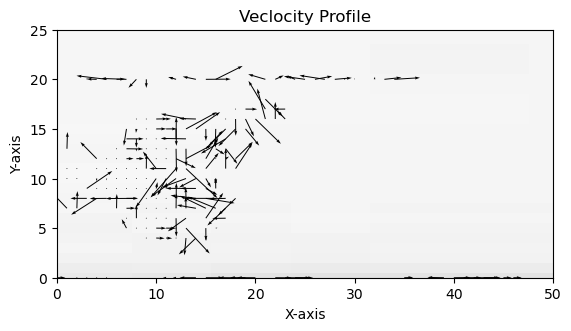

In [239]:
import matplotlib.pyplot as plt

# Load and display the image
plt.figure()
plt.imshow(img1, cmap='gray')

# Visualize velocity vectors
plt.quiver(u_phys, v_phys, scale=10, color='black', width=0.002)

# Set the x and y limits for the axes
plt.xlim(0, 50)  # image width
plt.ylim(0, 25)  # image height
plt.title("Veclocity Profile")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()


In [240]:
# import numpy as np
# import matplotlib.pyplot as plt
# import openpiv.pyprocess
# import openpiv.scaling
# from skimage.io import imread

# # Load images
# img1 = imread("frame_0.jpg")
# img2 = imread("frame_500.jpg")

# # Display images
# fig, axs = plt.subplots(1, 2, figsize=(9, 4))
# axs[0].imshow(img1, cmap=plt.cm.gray)
# axs[1].imshow(img2, cmap=plt.cm.gray)
# # plt.show()

# # Define parameters for PIV analysis
# window_size = 32
# overlap = 24
# dt = 1  # Time between consecutive frames (assumed to be 1)

# # Perform PIV analysis to calculate velocity field
# u, v, sig2noise = openpiv.pyprocess.extended_search_area_piv(
#     img1, img2, window_size=window_size, overlap=overlap, dt=dt)

# # Define pixel to meters scaling factor
# pixel_to_meters = 0.5

# # Get the dimensions of the velocity field
# x, y = u.shape

# # Convert pixel displacements to physical velocities
# u_phys_v_phys = openpiv.scaling.uniform(u, v, pixel_to_meters, x, y)

# # Now you have the physical velocities u_phys and v_phys
# # Access the physical velocities for the x and y directions
# u_phys = u_phys_v_phys[0]  # Assuming the x-direction velocities are in the first column
# v_phys = u_phys_v_phys[1]  # Assuming the y-direction velocities are in the second column

# # Visualize velocity vectors
# plt.figure()
# # plt.imshow(img1, cmap='gray')
# plt.quiver(u_phys, v_phys)
# plt.show()